# Analyzing predictions

In [32]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
sn.set(font='Noto Sans TC')

In [44]:
true_labels = pd.read_csv("../label_processing/slim_metadata.csv",
                 sep=",",
                 index_col=0)
N = len(true_labels.index)
print(f"N = {N}")
true_labels.head(10)

N = 744311


,composer
ID,
5925434,K. Totaka
3587506,Brandon
5595487,B. Shi
78586,B. Springsteen
2279696,G. F. Handel
5838018,D. Wilson
274021,E. Iseli
5960059,R. J. Williams
5954683,O. Und; J. L. Bell


In [34]:
top_composers=['J. S. Bach', 'Y. Kato  加藤 洋平', 'W. A. Mozart', 'P. F. Carera','T. Fox', 'L. V. Beethoven', 'J. Williams', 'K. Kondo','A. Vivaldi', 'A. Antão']

In [46]:
trunc_labels=true_labels[true_labels['composer'].apply(lambda x: x in top_composers)]

In [47]:
predicted_labels = pd.read_csv("./predictions.tsv",
                 sep="\t",
                 escapechar='\\',
                 index_col=0)
N = len(predicted_labels.index)
print(f"N = {N}")
predicted_labels.set_index('ID', inplace=True)
predicted_labels.head(10)

N = 8146


,predicted_composer
ID,
362386,J. S. Bach
6196263,T. Fox
5026412,L. V. Beethoven
4887846,Y. Kato 加藤 洋平
5995484,J. S. Bach
5050524,J. S. Bach
946136,Y. Kato 加藤 洋平
4808777,J. S. Bach
1358326,Y. Kato 加藤 洋平


In [48]:
merge=pd.merge(trunc_labels,predicted_labels, left_on='ID', right_on='ID')
merge

,composer,predicted_composer
ID,,
131072,J. S. Bach,J. S. Bach
5322976,T. Fox,J. S. Bach
5073314,J. S. Bach,L. V. Beethoven
3391526,J. Williams,P. F. Carera
6177755,W. A. Mozart,W. A. Mozart
...,...,...
5968060,Y. Kato 加藤 洋平,Y. Kato 加藤 洋平
5846651,Y. Kato 加藤 洋平,Y. Kato 加藤 洋平
5188468,K. Kondo,Y. Kato 加藤 洋平


In [75]:
confusion_matrix = pd.crosstab(merge['composer'], merge['predicted_composer'], rownames=['Actual'], colnames=['Predicted'], normalize='index')*100

In [76]:
for compo in top_composers:
    if compo not in confusion_matrix.columns:
        confusion_matrix[compo]=[0]*len(top_composers)
confusion_matrix=confusion_matrix.reindex(top_composers)[top_composers]

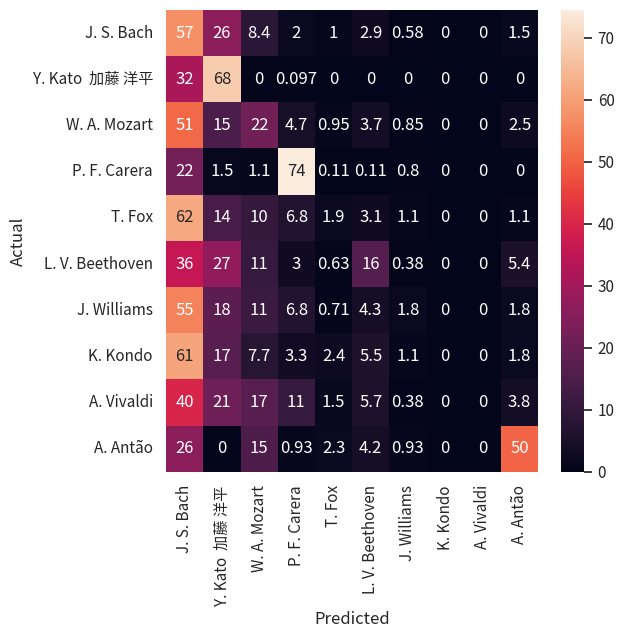

In [77]:
fig, ax=plt.subplots(figsize=(6,6))
sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='.2g')
plt.show()